### Dependencies

You can install all the depenencies neccessary using pip. It is recommended to use a virtualenv to protect your user level python installation.


```bash
# create a virtualenv in project directory
python3 -m venv venv && source venv/bin/activate && pip install -r requirements.txt

# open notebook
python3 -m jupyter notebook notebooks/getting-started.ipynb
```

In [21]:
import os
import sys
import torch
import hashlib
import seaborn as sns
import torchvision
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
# helper for ensuring we can import, otherwise it depends on where you start notebook from
if "common" not in sys.path:
    sys.path.append("..")

import common

# test run an import to ensure we can import
common.example.memoed_fib(25)

75025

In [287]:
# misc useful funttions
def np_to_md5(value: np.ndarray) -> str:
    return hashlib.md5(value.flatten().astype("uint8")).hexdigest()

# MNIST Exploratory data analysis (EDA)

In [213]:
KERAS_DIRECTORY = os.path.expanduser("~/.keras/datasets")
MNIST_FILEPATH = os.path.join(KERAS_DIRECTORY, "mnist.npz")
mnist = np.load(MNIST_FILEPATH)

In [224]:
(x_test, x_train, y_train, y_test) = dict(np.load(MNIST_FILEPATH)).values()

In [288]:
training = {
    "label": list(y_train.flatten()),
    "image_md5": [np_md5(img) for img in x_train], 
    "subset": ["training"] * x_train.shape[0]
}

test = {
    "label": list(y_test.flatten()),
    "image_md5": [np_md5(img) for img in x_test], 
    "subset": ["test"] * x_test.shape[0]
}

train_df = pd.DataFrame.from_records(training)
test_df = pd.DataFrame.from_records(test)
mnist_df = pd.concat([train_df, test_df])

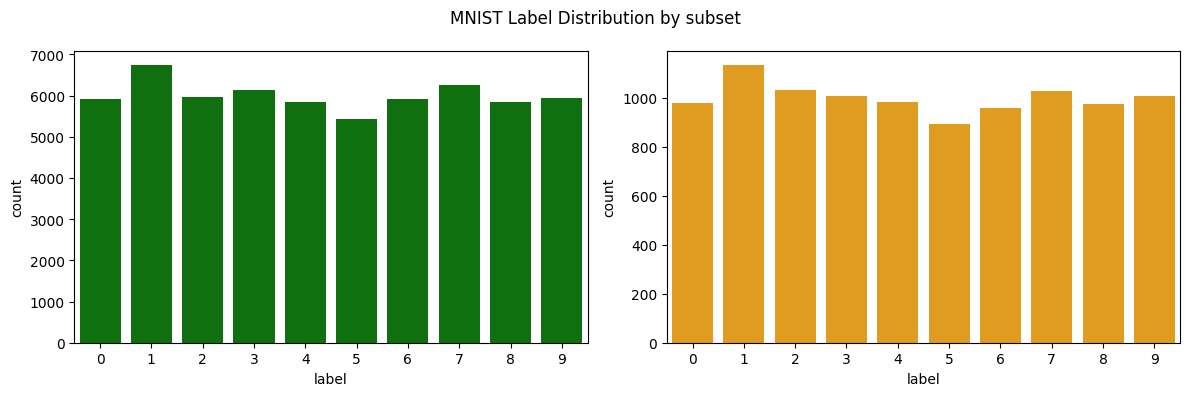

In [373]:

columns = ["label", "subset"]
counts_df = pd.DataFrame(mnist_df[columns].groupby(columns).size().reset_index())
counts_df.columns = [*columns, "count"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)

sns.barplot(x="label", y="count", data=counts_df[ counts_df.subset == "training" ], ax=ax1, color="green")
sns.barplot(x="label", y="count", data=counts_df[ counts_df.subset == "test" ], ax=ax2, color="orange")
fig.suptitle("MNIST Label Distribution by subset")
plt.show()

In [374]:
from sklearn.manifold import TSNE

fig, axs = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)
tsne_train_embeddings = TSNE().fit_transform(x_train.reshape(x_train.shape[0],x_train.shape[1]**2))
tsne_test_embeddings = TSNE().fit_transform(x_train.reshape(x_train.shape[0],x_train.shape[1]**2))

sns.barplot(x="c1", y="c2", data=counts_df[ counts_df.subset == "training" ], ax=axs[0, 0], color="green")
sns.barplot(x="label", y="count", data=counts_df[ counts_df.subset == "test" ], ax=axs[0, 1], color="orange")

fig.suptitle("MNIST Features (TSNE 2D projection)")

plt.show()

ValueError: Found array with dim 3. TSNE expected <= 2.

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)

sns.barplot(x="label", y="count", data=counts_df[ counts_df.subset == "training" ], ax=axs[0, 0], color="green")
sns.barplot(x="label", y="count", data=counts_df[ counts_df.subset == "test" ], ax=axs[0, 1], color="orange")

fig.suptitle("MNIST Features (TSNE 2D projection)")

plt.show()